In [1]:
from fastai.tabular import * 

In [2]:
df = pd.read_csv('../train.csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
df.shape

(200000, 202)

In [4]:
df=df.drop('ID_code',axis=1)

In [5]:
procs = [FillMissing, Categorify, Normalize]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


In [7]:
valid_idx = range(len(df)-10000, len(df))

In [8]:
dep_var = 'target'

In [96]:
??TabularDataBunch

In [100]:
df.columns[1:].tolist()

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

In [64]:
data = TabularDataBunch.from_df('../', df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=[],num_workers=0)

In [65]:
learn = tabular_learner(data, layers=[200,100], emb_szs={}, metrics=accuracy)
#learn.fit_one_cycle(1, 1e-2)

In [66]:
learn.lr_find(stop_div=True,num_it=200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


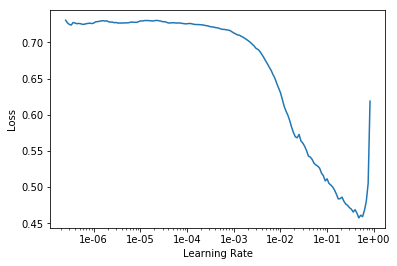

In [67]:
learn.recorder.plot()

In [68]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.243480,0.267459,0.893000,00:42
1,0.238157,0.256415,0.901000,00:53
2,0.238042,0.259674,0.902000,01:09


In [69]:
preds,y,losses = learn.get_preds(with_loss=True)

In [70]:
#from fastai.vision import ClassificationInterpretation

In [71]:
interp =ClassificationInterpretation(learn, preds, y, losses)

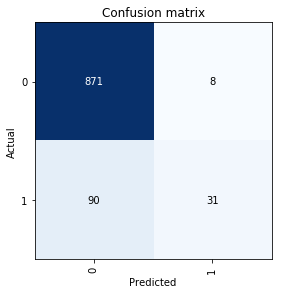

In [72]:
interp.plot_confusion_matrix()

In [73]:
preds_ls=preds.tolist()

In [74]:
y_ls=y.tolist()

In [75]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

In [76]:
y_ls=np.array(y_ls)

In [77]:
y_true=y_ls

In [78]:
y_scores=np.array([item[1] for item in preds_ls])

In [79]:
roc_auc_score(y_true, y_scores)

0.8618358578023486

# After 6 epochs

In [80]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.249048,0.262857,0.905000,01:13
1,0.238820,0.281355,0.901000,01:11
2,0.234096,0.259581,0.905000,01:11


In [81]:
preds,y,losses = learn.get_preds(with_loss=True)

In [82]:
#from fastai.vision import ClassificationInterpretation

In [83]:
interp =ClassificationInterpretation(learn, preds, y, losses)

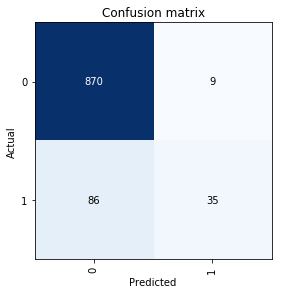

In [84]:
interp.plot_confusion_matrix()

In [85]:
preds_ls=preds.tolist()

In [86]:
y_ls=y.tolist()

In [87]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

In [88]:
y_ls=np.array(y_ls)

In [89]:
y_true=y_ls

In [90]:
y_scores=np.array([item[1] for item in preds_ls])

In [91]:
roc_auc_score(y_true, y_scores)

0.8610084713094333

## Make predictions on test set for Kaggle submissions

In [9]:
test=pd.read_csv('../test.csv')

In [10]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [11]:
test_df=test.drop('ID_code',axis=1)

In [12]:
test.shape

(200000, 201)

In [107]:
test=learn.predict(test_df.iloc[0])

In [121]:
test[2].data[1].item()

0.13642452657222748

In [123]:
test_df.shape[0]

200000

In [ ]:
test_preds=[learn.predict(test_df.iloc[i]) for i in range()]

In [124]:
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [17]:
dep_var

'target'

In [20]:
valid_idx

range(190000, 200000)

In [28]:
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [34]:
data = (TabularList.from_df(df, procs=procs,cont_names=df.columns[1:].tolist())
        .split_by_idx(valid_idx=valid_idx)
        .label_from_df(dep_var)
        .add_test(TabularList.from_df(test_df))
        .databunch(num_workers=0))


In [35]:
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [14]:
test_df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [21]:
type(data)

fastai.tabular.data.TabularDataBunch

In [38]:
data.valid_ds

LabelList (10000 items)
x: TabularList
var_0 -0.6567; var_1 -1.2845; var_2 1.6797; var_3 1.0825; var_4 1.3662; var_5 0.8760; var_6 -0.6920; var_7 0.1832; var_8 0.4355; var_9 -0.9306; var_10 0.8980; var_11 -0.5797; var_12 -0.2622; var_13 -1.5541; var_14 1.3211; var_15 -0.4725; var_16 -0.9334; var_17 0.9821; var_18 1.5652; var_19 0.0036; var_20 -1.4535; var_21 -0.8663; var_22 -1.1825; var_23 -1.9851; var_24 -0.5991; var_25 -1.3942; var_26 -1.9138; var_27 -0.5783; var_28 -1.7337; var_29 -0.8945; var_30 -1.4807; var_31 0.3440; var_32 0.0972; var_33 -0.3151; var_34 0.1115; var_35 -0.7877; var_36 -0.3765; var_37 -0.5791; var_38 -1.3539; var_39 -0.3725; var_40 -0.6613; var_41 0.9142; var_42 0.4898; var_43 -0.1801; var_44 -0.5848; var_45 -0.0418; var_46 -1.7890; var_47 0.4321; var_48 -0.4226; var_49 2.3094; var_50 -2.1599; var_51 0.1900; var_52 0.2239; var_53 0.3368; var_54 -0.2431; var_55 1.1881; var_56 0.1362; var_57 0.1083; var_58 0.2701; var_59 0.2380; var_60 -1.3656; var_61 -1.6029; var_6

In [39]:
learn = tabular_learner(data, layers=[200,100], emb_szs={}, metrics=accuracy)
#learn.fit_one_cycle(1, 1e-2)

In [40]:
learn.lr_find(stop_div=True,num_it=200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


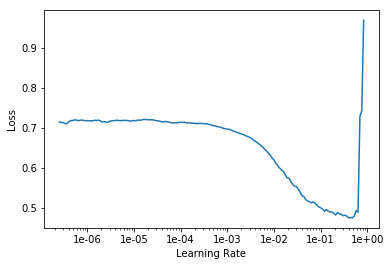

In [41]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.243191,0.275143,0.909600,00:37
1,0.230912,0.238808,0.913400,00:42
2,0.256328,0.235769,0.914700,00:51


In [43]:
preds,y,losses = learn.get_preds(with_loss=True)

In [44]:
#from fastai.vision import ClassificationInterpretation

In [45]:
interp =ClassificationInterpretation(learn, preds, y, losses)

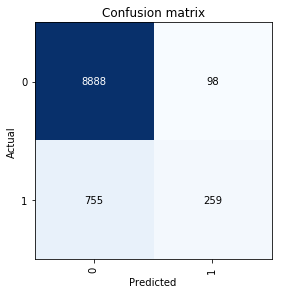

In [46]:
interp.plot_confusion_matrix()

In [55]:
test_preds=learn.get_preds(DatasetType.Test)

In [56]:
test_preds

[tensor([[0.8391, 0.1609],
         [0.7291, 0.2709],
         [0.9458, 0.0542],
         ...,
         [0.9958, 0.0042],
         [0.9475, 0.0525],
         [0.8695, 0.1305]]), tensor([0, 0, 0,  ..., 0, 0, 0])]

In [156]:
test_df.shape

(200000, 201)

In [60]:
test_preds[0].data[0][1].item()

0.16086401045322418

In [63]:
test_preds_ls=[1*(test_preds[0].data[i][1].item()>0.5) for i in range(200000)]

In [64]:
np.sum(test_preds_ls)

5266

In [66]:
test_preds_ls=np.array(test_preds_ls)

In [67]:
subm=pd.read_csv('../sample_submission.csv')

In [68]:
subm.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [69]:
subm['target']=test_preds_ls

In [72]:
subm.to_csv('dl_subm.csv',index=False)

In [73]:
subm.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [74]:
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.242185,0.301162,0.911100,00:56
1,0.239173,0.236838,0.912900,00:58


In [75]:
preds,y,losses = learn.get_preds(with_loss=True)

In [76]:
#from fastai.vision import ClassificationInterpretation

In [77]:
interp =ClassificationInterpretation(learn, preds, y, losses)

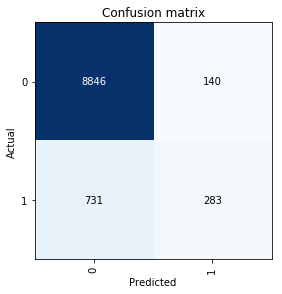

In [78]:
interp.plot_confusion_matrix()

In [79]:
test_preds=learn.get_preds(DatasetType.Test)

In [80]:
test_preds

[tensor([[0.8198, 0.1802],
         [0.7673, 0.2327],
         [0.9543, 0.0457],
         ...,
         [0.9960, 0.0040],
         [0.9465, 0.0535],
         [0.8457, 0.1543]]), tensor([0, 0, 0,  ..., 0, 0, 0])]

In [156]:
test_df.shape

(200000, 201)

In [60]:
test_preds[0].data[0][1].item()

0.16086401045322418

In [81]:
test_preds_ls=[1*(test_preds[0].data[i][1].item()>0.5) for i in range(200000)]

In [82]:
np.sum(test_preds_ls)

6491

In [83]:
test_preds_ls=np.array(test_preds_ls)

In [84]:
subm['target']=test_preds_ls

In [85]:
subm.to_csv('dl_subm_5epochs.csv',index=False)